## Imports

In [10]:
import sys
sys.path.append('../Scripts')

In [11]:
import text_preprocessing_v2 as tp2
import pandas as pd, numpy as np

## Paths

In [12]:
data_training_en_path = '../Author profiling/PAN19-Author-Profiling/Datasets/CSV/Train-EN.csv'
data_training_es_path = '../Author profiling/PAN19-Author-Profiling/Datasets/CSV/Train-ES.csv'
data_test_en_path = '../Author profiling/PAN19-Author-Profiling/Datasets/CSV/Test-EN.csv'
data_test_es_path = '../Author profiling/PAN19-Author-Profiling/Datasets/CSV/Test-ES.csv'

## Data

In [13]:
data_training_en = pd.read_csv(data_training_en_path)
data_test_en = pd.read_csv(data_test_en_path)

In [15]:
data_training_en.shape[0], data_test_en.shape[0]

(412000, 264000)

In [16]:
data_training_es = pd.read_csv(data_training_es_path)
data_test_es = pd.read_csv(data_test_es_path)

In [17]:
data_training_es.shape[0], data_test_es.shape[0]

(300000, 180000)

## Preprocessing

In [18]:
prep_en = tp2.Preprocessing(language='english')
prep_es = tp2.Preprocessing(language='spanish')

### English

In [19]:
data_training_en = prep_en.main_preprocess(data=data_training_en, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None,
                                tweet=True)

In [20]:
data_training_en.head()

,Unnamed: 0,id,tweet,author,gender
0,0,867be96f95dfc4e24541d19c6a5ab8bf,alex is too nice for love island,human,female
1,1,867be96f95dfc4e24541d19c6a5ab8bf,teenager charged with rape of woman at block o...,human,female
2,2,867be96f95dfc4e24541d19c6a5ab8bf,,human,female
3,3,867be96f95dfc4e24541d19c6a5ab8bf,happy bday ryan have the best day xx,human,female
4,4,867be96f95dfc4e24541d19c6a5ab8bf,i just wanna let jenny know that she is a fat ...,human,female


In [21]:
data_test_en = prep_en.main_preprocess(data=data_test_en, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None,
                                tweet=True)

In [22]:
data_test_en.head()

,Unnamed: 0,id,tweet,author,gender
0,0,c7bc6b52fcc949263986b3b837432687,her attitude was,bot,bot
1,1,c7bc6b52fcc949263986b3b837432687,if you re on her mom this team has so much,bot,bot
2,2,c7bc6b52fcc949263986b3b837432687,watch hillary speak to the national debt revok...,bot,bot
3,3,c7bc6b52fcc949263986b3b837432687,what hillary s all about is making sure every ...,bot,bot
4,4,c7bc6b52fcc949263986b3b837432687,democrats stand in your america,bot,bot


In [11]:
data_training_en = data_training_en.dropna(how='all')
data_test_en = data_test_en.dropna(how='all')

### Spanish

In [23]:
data_training_es = prep_es.main_preprocess(data=data_training_es, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None,
                                tweet=True)

In [24]:
data_training_es.head()

,Unnamed: 0,id,tweet,author,gender
0,0,3528ef91c7484ec189dcc82a7f9cd613,si me quereis ganar en san valentin,human,female
1,1,3528ef91c7484ec189dcc82a7f9cd613,choco aun no tiene adopcion esta en extremadur...,human,female
2,2,3528ef91c7484ec189dcc82a7f9cd613,cuando t enteras d k tu humano ha estado acari...,human,female
3,3,3528ef91c7484ec189dcc82a7f9cd613,la tecnica del bodypainting se perfecciona has...,human,female
4,4,3528ef91c7484ec189dcc82a7f9cd613,stoi yorando,human,female


In [26]:
data_test_es = prep_es.main_preprocess(data=data_test_es, 
                                column='tweet', 
                                remove_stop_words=False, 
                                is_dataframe=True, 
                                emoji_path=None, 
                                tweet=True)

In [27]:
data_test_es.head()

,Unnamed: 0,id,tweet,author,gender
0,0,a226558f190ca0e4aba481803949cea1,ay cdlm,human,male
1,1,a226558f190ca0e4aba481803949cea1,con una camisa hawaiana y pantuflas de flamingo,human,male
2,2,a226558f190ca0e4aba481803949cea1,me voy a pintar las canas y me le voy a presen...,human,male
3,3,a226558f190ca0e4aba481803949cea1,se sorprenden de que juan gabriel haya podido ...,human,male
4,4,a226558f190ca0e4aba481803949cea1,esta bien pensar distinto ser como el salmon i...,human,male


In [ ]:
data_training_es = data_training_es.dropna(how='all')
data_test_es = data_test_es.dropna(how='all')

In [40]:
clean_data = [data_training_en, data_training_es, data_test_en, data_test_es]
data_names = ['data_train_en', 'data_train_es', 'data_test_en', 'data_test_es']
path_to_save = '../Author profiling/PAN19-Author-Profiling/Datasets/CSV/Clean/'

In [41]:
for i in range(4):
    clean_data[i].to_csv(f'{path_to_save}{data_names[i]}.csv')

## Data visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [29]:
bar_colors = ['tab:red', 'tab:blue']

In [30]:
def plot_counts(labels, counted_labels, bar_colors, x_label, y_label, plot_title, plot_size):
    fig = plt.figure(figsize=plot_size)
    
    plt.bar(labels, counted_labels, color=bar_colors)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)

    plt.figure(figsize=plot_size)
    plt.show()

### English

In [31]:
data_training_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412000 entries, 0 to 411999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  412000 non-null  int64 
 1   id          412000 non-null  object
 2   tweet       412000 non-null  object
 3   author      412000 non-null  object
 4   gender      412000 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB


In [32]:
values_author_en = data_training_en.author.value_counts()
values_gender_en = data_training_en.gender.value_counts()

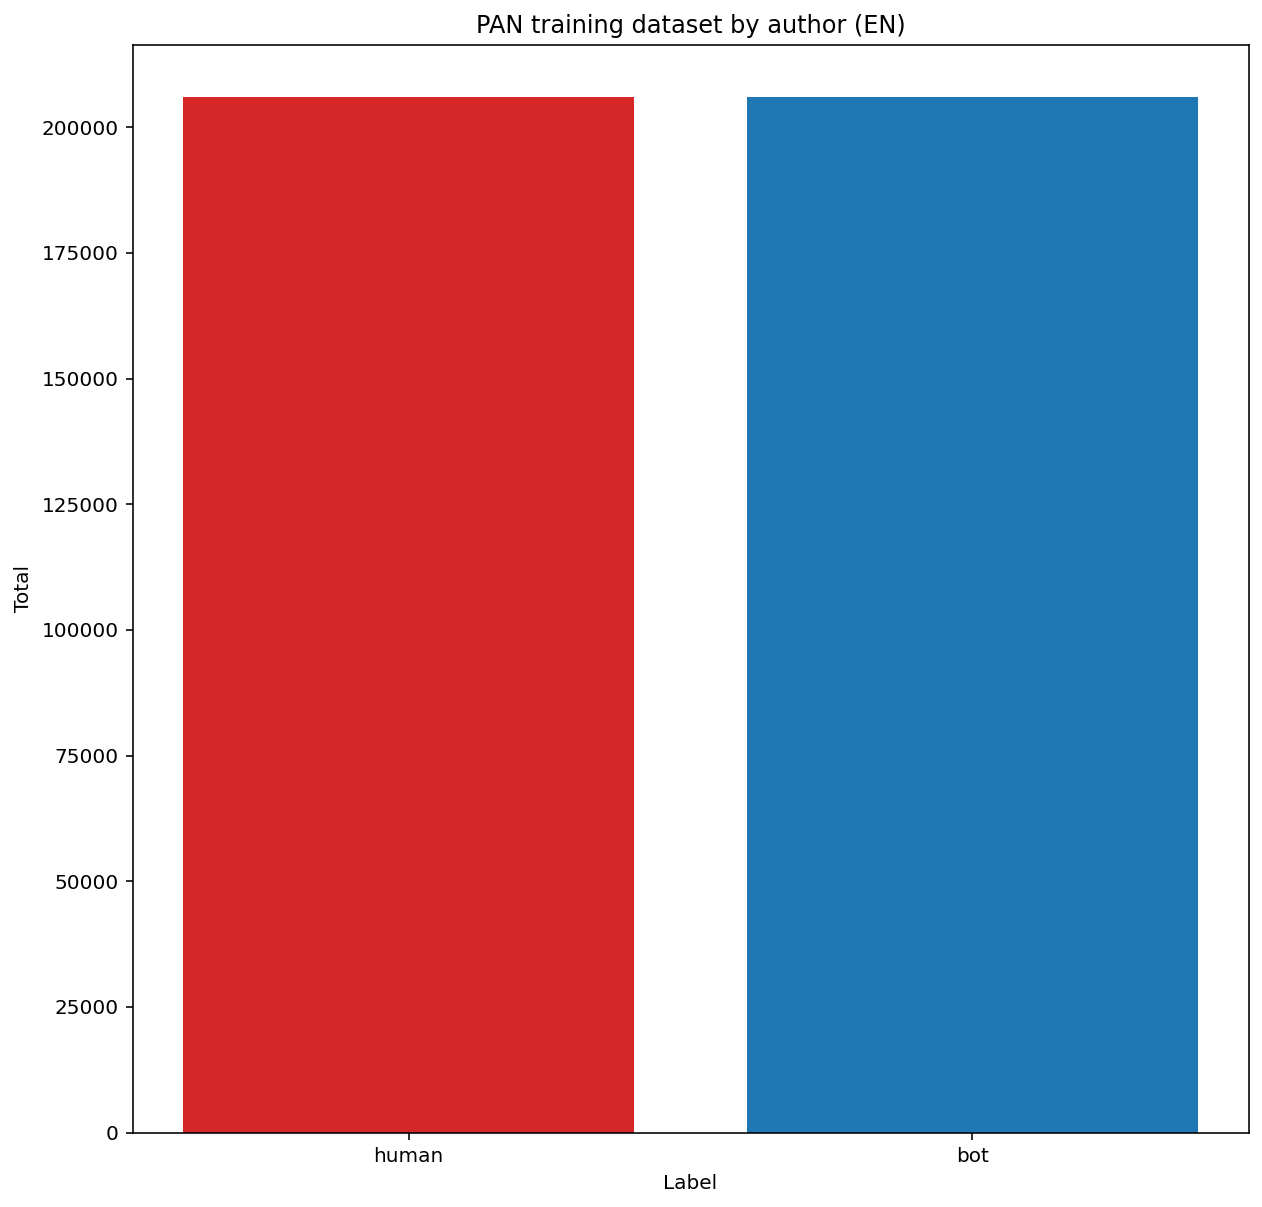

<Figure size 720x720 with 0 Axes>

In [33]:
plot_counts(labels=values_author_en.keys().tolist(), 
            counted_labels=values_author_en.values.tolist(),
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by author (EN)',
            plot_size=(10,10))

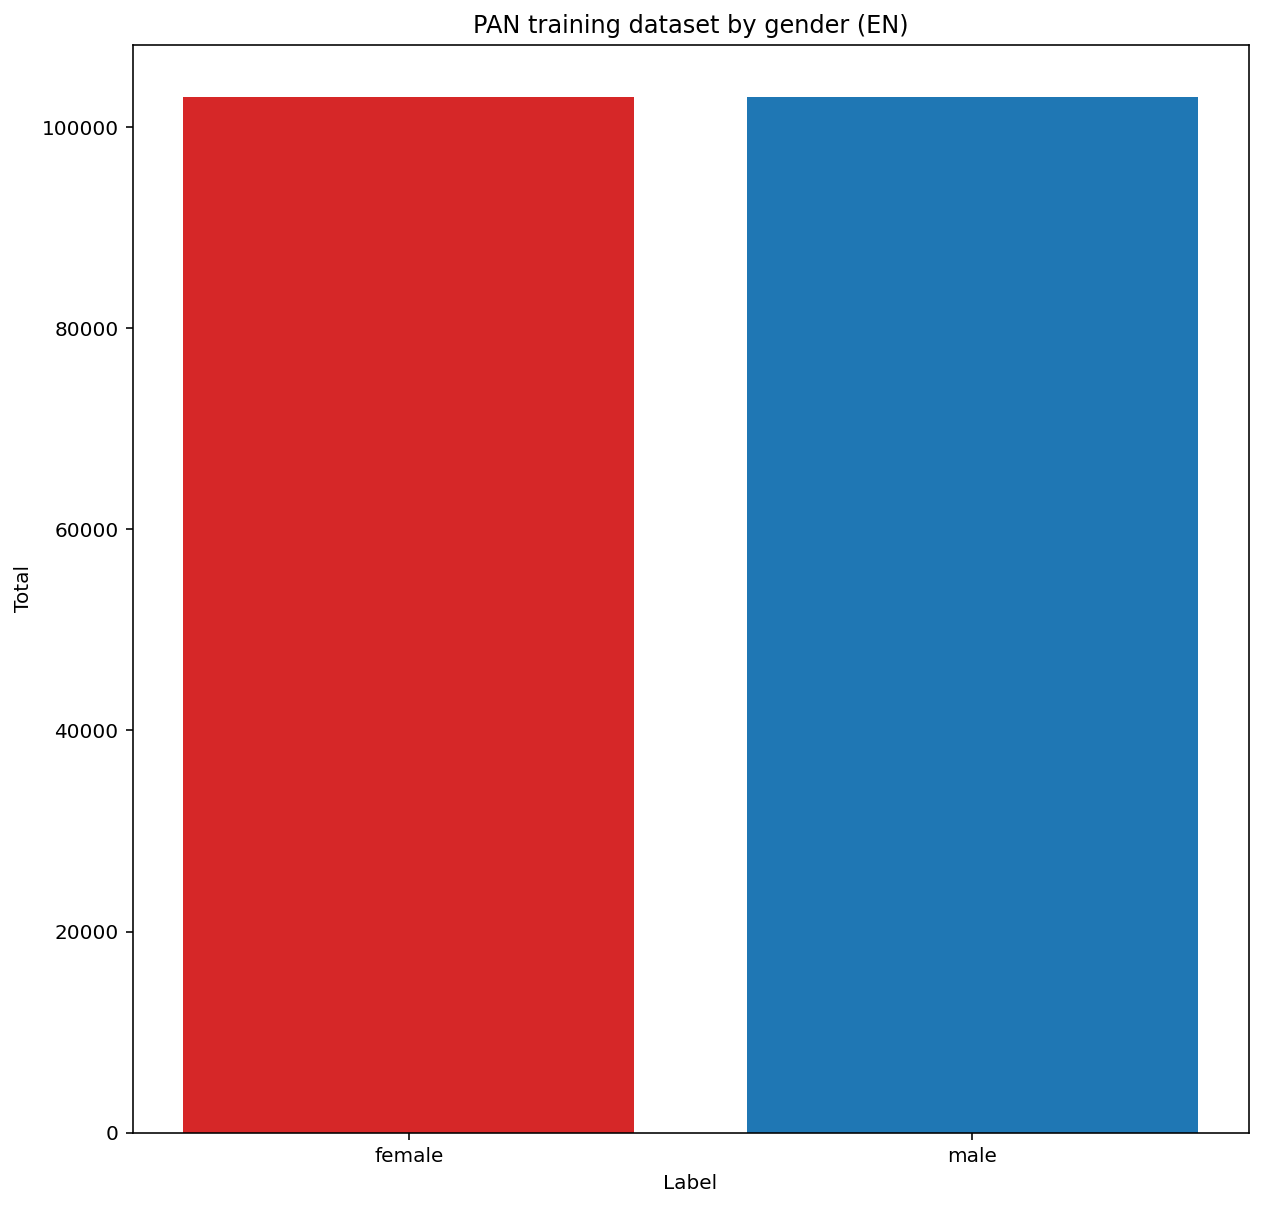

<Figure size 720x720 with 0 Axes>

In [34]:
plot_counts(labels=values_gender_en.keys().tolist()[1:], 
            counted_labels=values_gender_en.values.tolist()[1:],
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by gender (EN)',
            plot_size=(10,10))

### Spanish

In [35]:
data_training_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  300000 non-null  int64 
 1   id          300000 non-null  object
 2   tweet       300000 non-null  object
 3   author      300000 non-null  object
 4   gender      300000 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.4+ MB


In [36]:
values_author_es = data_training_es.author.value_counts()
values_gender_es = data_training_en.gender.value_counts()

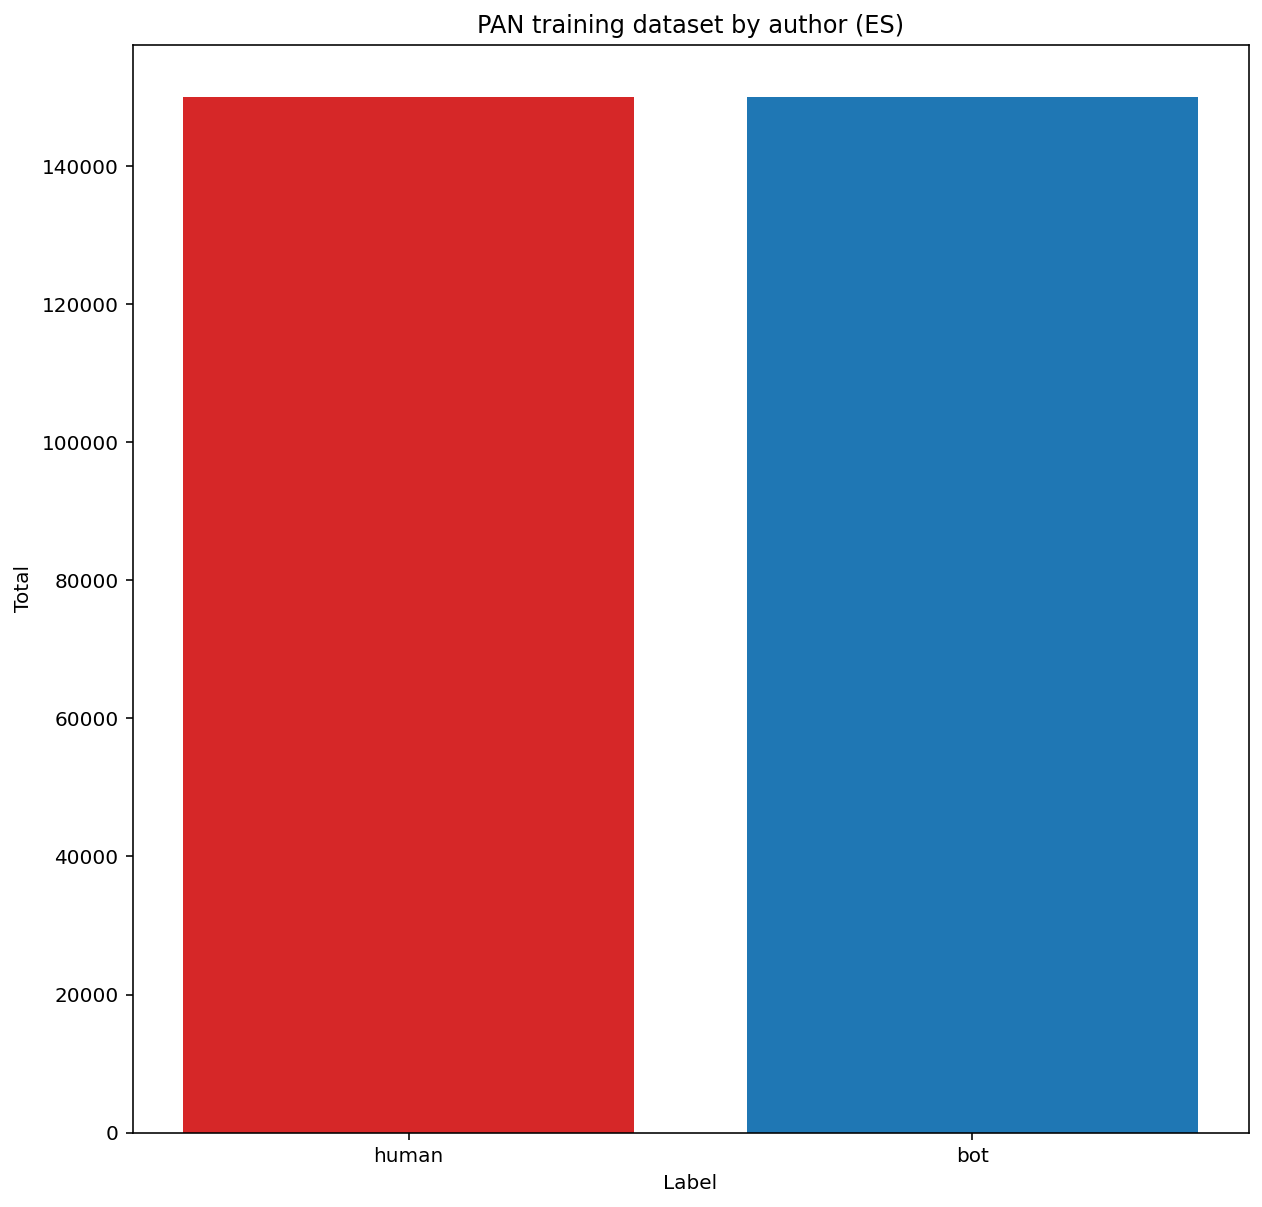

<Figure size 720x720 with 0 Axes>

In [37]:
plot_counts(labels=values_author_es.keys().tolist(), 
            counted_labels=values_author_es.values.tolist(),
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by author (ES)',
            plot_size=(10,10))

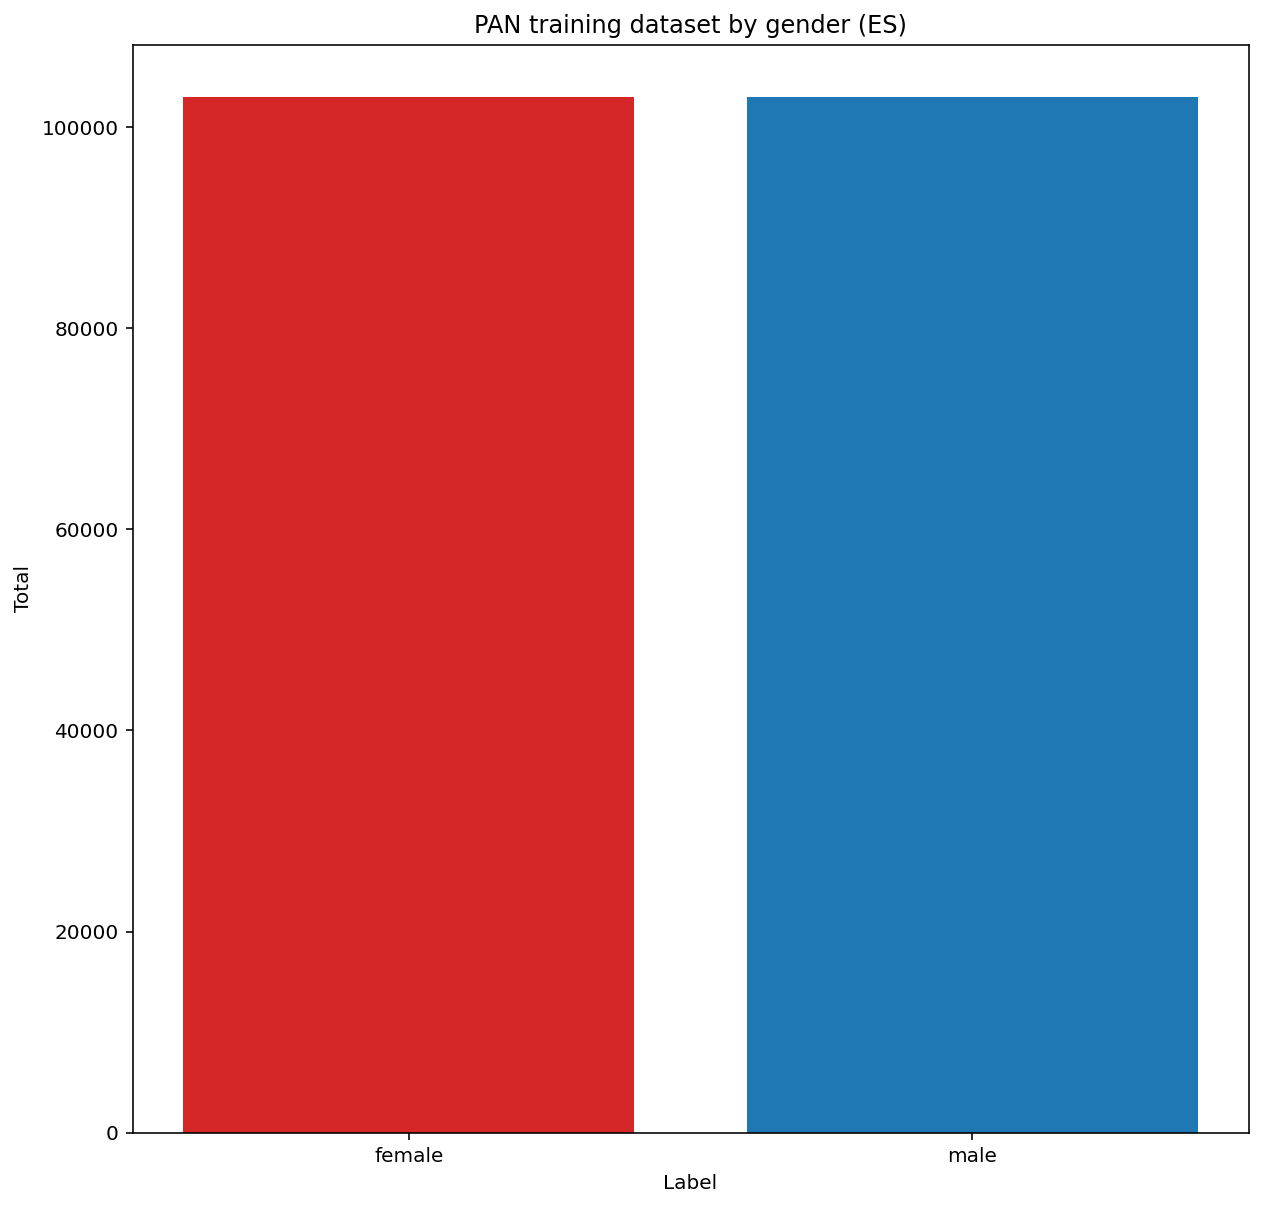

<Figure size 720x720 with 0 Axes>

In [38]:
plot_counts(labels=values_gender_es.keys().tolist()[1:], 
            counted_labels=values_gender_es.values.tolist()[1:],
            bar_colors=bar_colors,
            x_label='Label',
            y_label='Total',
            plot_title='PAN training dataset by gender (ES)',
            plot_size=(10,10))

## Baseline

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
def change_labels(dataframes, columns, dictionary_list):
    for df in dataframes:
        for i, column in enumerate(columns):
            df[column].replace(list(dictionary_list[i].keys()), 
                                        list(dictionary_list[i].values()), 
                                        inplace=True)

In [167]:
ejemplo = data_training_en.copy()
ejemplo_2 = data_test_en.copy()

In [23]:
dataframes = [data_training_en, data_test_en, data_training_es, data_test_es]
dataframes_names = ['data_training_en', 'data_test_en', 'data_training_es', 'data_test_es']
columns = ['author', 'gender']
dictionary_list = [{'human': 0,
                    'bot':1},
                    {'male': 0,
                    'female':1,
                    'bot':2}]
path_to_save_clean = '../Author profiling/Datasets/PAN19-Author-Profiling-20200229/CSV/Clean/'

In [20]:
change_labels(dataframes=dataframes, columns=columns, dictionary_list=dictionary_list)

In [26]:
for index, df in enumerate(dataframes):
    df.to_csv(f'{path_to_save_clean}{dataframes_names[index]}.csv')

In [181]:
def baseline(model, train_data, test_data, x_label_column, y_label_column, target_names):
    # Training data
    x_train = train_data[x_label_column].tolist()
    y_train = train_data[y_label_column].tolist()

    # Test data
    x_test = test_data[x_label_column].tolist()
    y_test = test_data[y_label_column].tolist()

    # Vectorizing text data
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3)
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)

    # Fitting model
    print(f'Fitting {y_label_column} model')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Results
    print(metrics.classification_report(y_test, y_pred, target_names=target_names))


    return model, vectorizer


In [182]:
seed = 42
scoring = scoring = {'Accuracy': 'accuracy', 'F1-Score': 'f1', 
                'Precision': 'precision', 'Recall': 'recall'}
model = LogisticRegression(random_state = seed, penalty = 'l2', 
                            solver = 'liblinear', max_iter = 1000)

In [183]:
model_author_en, vectorizer_author_en = baseline(model=model, 
                                                train_data=data_training_en, 
                                                test_data=data_test_en, 
                                                x_label_column='tweet',
                                                y_label_column='author',
                                                target_names=list(dictionary_list[0].keys()))

Fitting author model
              precision    recall  f1-score   support

       human       0.73      0.93      0.82      3452
         bot       0.87      0.57      0.69      2800

    accuracy                           0.77      6252
   macro avg       0.80      0.75      0.75      6252
weighted avg       0.79      0.77      0.76      6252



In [184]:
model_gender_en, vectorizer_gender_en = baseline(model=model, 
                                                train_data=data_training_en, 
                                                test_data=data_test_en, 
                                                x_label_column='tweet',
                                                y_label_column='gender',
                                                target_names=list(dictionary_list[1].keys()))

Fitting gender model
              precision    recall  f1-score   support

        male       0.24      0.36      0.29      1000
      female       0.66      0.51      0.57      2452
         bot       0.76      0.79      0.77      2800

    accuracy                           0.61      6252
   macro avg       0.55      0.55      0.55      6252
weighted avg       0.64      0.61      0.62      6252

